In [31]:
%matplotlib inline

import codecs
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
G = nx.read_gexf('graph.xml')

In [3]:
G.number_of_nodes()

16256

In [4]:
G.number_of_edges()

364458

In [13]:
deg = nx.degree_centrality(G)
labels = nx.get_node_attributes(G,'label')

In [16]:
i = 0
for nodeid in sorted(deg, key=deg.get, reverse=True):
    i += 1
    if i == 51:
        break
    print (str(i) + '. ' + labels[nodeid] + '\t' + str(round(deg[nodeid], 3)))

1. Толстой Лев Николаевич	0.6
2. Толстая Софья Андреевна, рожд. Берс	0.262
3. Чертков Владимир Григорьевич	0.25
4. Сухотина Татьяна Львовна, рожд. Толстая	0.241
5. Москва	0.21
6. Оболенская Мария Львовна, рожд. Толстая	0.192
7. Бирюков Павел Иванович	0.162
8. Ясная Поляна	0.161
9. Толстой Сергей Николаевич	0.156
10. Толстой Сергей Львович	0.153
11. Толстой Лев Львович	0.14
12. Маковицкий Душан Петрович	0.134
13. Петербург	0.126
14. Россия (Русь)	0.124
15. Толстой Илья Львович	0.118
16. «Посредник», издательство	0.117
17. Толстая Мария Николаевна (сестра Толстого)	0.114
18. Толстая Александра Львовна	0.112
19. Толстой Андрей Львович	0.111
20. Горбунов-Посадов Иван Иванович	0.109
21. Кузминская Татьяна Андреевна, рожд. Берс	0.109
22. Тула	0.106
23. Страхов Николай Николаевич	0.102
24. Гусев Николай Николаевич	0.098
25. Толстая Александра Андреевна	0.095
26. Тургенев Иван Сергеевич	0.092
27. Фет Афанасий Афанасьевич (Шеншин)	0.09
28. Буланже Павел Александрович	0.089
29. Черткова Анна Кон

In [17]:
#nx.average_clustering(G)
sum(G.degree().values())/float(len(G))

44.839812992125985

In [19]:
G1 = G.to_undirected()

In [20]:
nx.average_clustering(G1)

0.7448133141221301

In [21]:
nx.write_gexf(G1, 'data.gexf')

### Неориентированный граф

In [2]:
G = nx.read_gexf('data.gexf')

In [3]:
labels = nx.get_node_attributes(G,'label')

In [7]:
#import matplotlib.pyplot as plt

In [4]:
tolstoy_family = []
for nodeid in G:
    if u'Толстой' in labels[nodeid] or u'Толстая' in labels[nodeid] or u'Толстые' in labels[nodeid]:
        tolstoy_family.append((nodeid, labels[nodeid]))
print (len(tolstoy_family))

141


In [5]:
tolstoy_family_nodesid = []
for fm in tolstoy_family:
    tolstoy_family_nodesid.append(fm[0])
family_G = G.subgraph(tolstoy_family_nodesid)

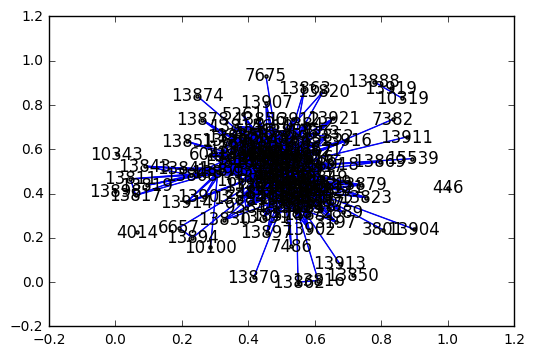

In [32]:
pos=nx.spring_layout(family_G)
nx.draw_networkx_nodes(family_G, pos, node_color='grey', node_size=5)
nx.draw_networkx_edges(family_G, pos, width=0.5)
nx.draw_networkx_edges(family_G, pos, edge_color='b')
nx.draw_networkx_labels(family_G, pos, font_size=12, font_family='sans-serif')
plt.show()

In [8]:
f = codecs.open('tolstoy_family.csv', 'w', 'utf-8')
for pr in tolstoy_family:
    f.write(pr[1] + '\n')
f.close()

In [14]:
#i = 0
#for nodeid in sorted(G):
#    i += 1
#    if u' губ.' in labels[nodeid] or u'Толстой' in labels[nodeid] or u'Толстая' in labels[nodeid] or u'журнал' in labels[nodeid] or u'газета' in labels[nodeid] or u'«' in labels[nodeid] or u' река' in labels[nodeid] or u' гора' in labels[nodeid] or u'(Швейцария)' in labels[nodeid] or u'(Италия)' in labels[nodeid] or u'(Франция)' in labels[nodeid]:
#        continue
#    if 16001 <= i < 17001:
#        print labels[nodeid]

In [10]:
#places_gub = []
#for nodeid in G:
#    if u' губ.' in labels[nodeid]:
#        places_gub.append((nodeid, labels[nodeid]))
#print (len(places_gub))

721


In [11]:
#fg = codecs.open('places_gub.csv', 'w', 'utf-8')
#for place in places_gub:
#    fg.write(place[1] + '\n')
#fg.close()

In [10]:
press = []
for nodeid in G:
    if u'журнал' in labels[nodeid] or u'газета' in labels[nodeid]:
        press.append((nodeid, labels[nodeid]))
print (len(press))

#fg = codecs.open('press.csv', 'w', 'utf-8')
#for pr in press:
#    fg.write(pr[1] + '\n')
#fg.close()

171


In [11]:
press_nodesid = []
for fm in press:
    press_nodesid.append(fm[0])
press_G = G.subgraph(press_nodesid)

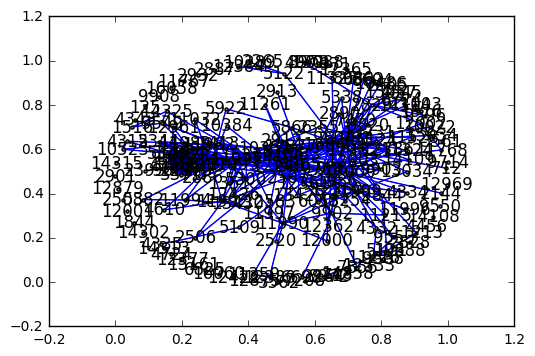

In [33]:
pos=nx.spring_layout(press_G)
nx.draw_networkx_nodes(press_G, pos, node_color='grey', node_size=5)
nx.draw_networkx_edges(press_G, pos, width=0.5)
nx.draw_networkx_edges(press_G, pos, edge_color='b')
nx.draw_networkx_labels(press_G, pos, font_size=12, font_family='sans-serif')
plt.show()

In [13]:
deg_press = nx.degree_centrality(press_G)
labels_press = nx.get_node_attributes(press_G,'label')


In [16]:
i = 0
for nodeid in sorted(deg_press, key=deg_press.get, reverse=True):
    i += 1
    if i == 26:
        break
    print (str(i) + '. ' + labels_press[nodeid] + '\t' + str(round(deg_press[nodeid], 3)))

1. «Русские ведомости», газета	0.235
2. «Русский вестник», журнал	0.171
3. «Современник», журнал	0.165
4. «Русский мир», газета	0.165
5. «Санкт-Петербургские ведомости», газета	0.153
6. «Ясная Поляна», журнал	0.153
7. «Вестник Европы», журнал	0.135
8. «Биржевые ведомости», газета	0.118
9. «Новое время», газета	0.118
10. «Русская мысль», журнал	0.112
11. «Звездочка», журнал	0.112
12. «Грамотей», журнал	0.1
13. «Отечественные записки», журнал	0.1
14. «Время», журнал	0.1
15. «Орел», журнал	0.1
16. «Русское слово», журнал	0.1
17. «Неделя», газета	0.094
18. «Русское слово», газета	0.088
19. «Народное чтение», журнал	0.088
20. «Современная летопись», журнал	0.088
21. «Нива», журнал	0.088
22. «Юношеский журнал»	0.082
23. «Детский журнал»	0.082
24. «Современное слово», журнал	0.082
25. «Гирлянда», журнал	0.082


In [23]:
#places = []
#f = codecs.open('places.csv', 'r', 'utf-8')
#for line in f:
#    place = line.replace('\n', '')
#    places.append(place)
#f.close()

#toponyms = []
#for nodeid in G:
#    if u' река' in labels[nodeid] or u' гора' in labels[nodeid] or u'(Швейцария)' in labels[nodeid] or u'(Италия)' in labels[nodeid] or u'(Франция)' in labels[nodeid]:
#        if labels[nodeid] not in places:
#            toponyms.append((nodeid, labels[nodeid]))
#print (len(press))

#fg = codecs.open('places.csv', 'a', 'utf-8')
#for pr in toponyms:
#    fg.write(pr[1] + '\n')
#fg.close()

In [23]:
cities = []
f = codecs.open('cities.csv', 'r', 'utf-8')
for line in f:
    if '\t' in line:
        place, coord = line.split('\t')
    place = line.replace('\n', '')
    cities.append(place)
f.close()
print(len(cities))

216


In [26]:
cities_nodesid = []
for fm in cities:
    for nodeid in G:
        if labels[nodeid] == fm:
            cities_nodesid.append(nodeid)
            break
cities_G = G.subgraph(cities_nodesid)

216
['9316', '10687', '14098', '10088', '10208', '10223', '10227', '10229', '1043', '10436']
216


In [27]:
labels_cities = nx.get_node_attributes(cities_G,'label')

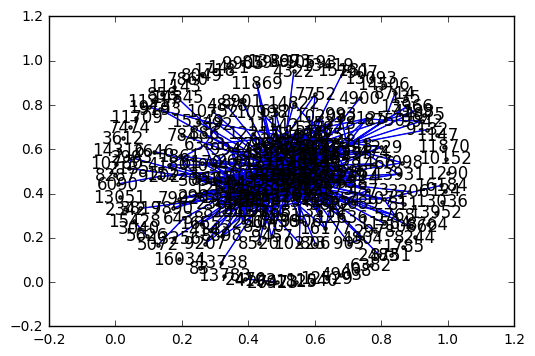

In [34]:
pos=nx.spring_layout(cities_G)
nx.draw_networkx_nodes(cities_G, pos, node_color='grey', node_size=5)
nx.draw_networkx_edges(cities_G, pos, width=0.5)
nx.draw_networkx_edges(cities_G, pos, edge_color='b')
nx.draw_networkx_labels(cities_G, pos, font_size=12, font_family='sans-serif')
plt.show()

In [29]:
deg_cities = nx.degree_centrality(cities_G)
labels_cities = nx.get_node_attributes(cities_G,'label')

In [30]:
i = 0
for nodeid in sorted(deg_cities, key=deg_cities.get, reverse=True):
    i += 1
    if i == 51:
        break
    print (str(i) + '. ' + labels_cities[nodeid] + '\t' + str(round(deg_cities[nodeid], 3)))

1. Москва	0.433
2. Петербург	0.4
3. Париж	0.242
4. Тула	0.228
5. Киев	0.209
6. Рим	0.14
7. Полтава	0.13
8. Варшава	0.126
9. Лондон	0.121
10. Казань	0.116
11. Берлин	0.112
12. Севастополь	0.107
13. Вена	0.107
14. Самара	0.107
15. Азов	0.107
16. Воронеж	0.102
17. Саратов	0.102
18. Нижний-Новгород	0.098
19. Харьков	0.098
20. Одесса	0.088
21. Тамбов	0.084
22. Смоленск	0.079
23. Гродно	0.079
24. Дрезден	0.079
25. Тифлис	0.074
26. Астрахань	0.074
27. Рига	0.07
28. Ярославль	0.07
29. Тверь	0.07
30. Флоренция	0.06
31. Орел, город	0.06
32. Пенза	0.056
33. Новгород	0.056
34. Люблин	0.056
35. Батум	0.056
36. Курск	0.056
37. Архангельск	0.051
38. Дерпт (Юрьев)	0.051
39. Кишинев	0.051
40. Марсель	0.051
41. Калуга	0.051
42. Венеция	0.047
43. Иерусалим	0.047
44. Псков	0.047
45. Владимир, город	0.047
46. Бухарест	0.047
47. Тильзит (Пруссия)	0.047
48. Иркутск	0.042
49. Женева	0.042
50. Выборг	0.042


In [35]:
countries = []
f = codecs.open('countries.csv', 'r', 'utf-8')
for line in f:
    if '\t' in line:
        place, coord = line.split('\t')
    place = line.replace('\n', '')
    countries.append(place)
f.close()
print(len(countries))

80


In [36]:
countries_nodesid = []
for fm in countries:
    for nodeid in G:
        if labels[nodeid] == fm:
            countries_nodesid.append(nodeid)
            break
countries_G = G.subgraph(countries_nodesid)

In [37]:
labels_countries = nx.get_node_attributes(countries_G,'label')

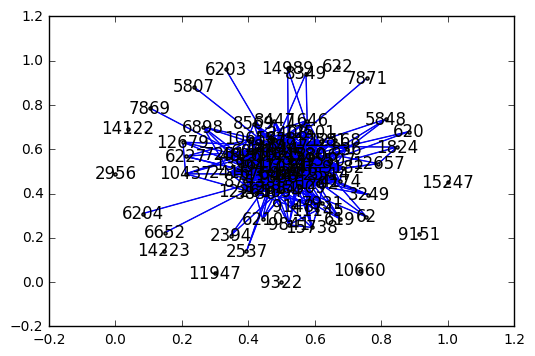

In [38]:
pos=nx.spring_layout(countries_G)
nx.draw_networkx_nodes(countries_G, pos, node_color='grey', node_size=5)
nx.draw_networkx_edges(countries_G, pos, width=0.5)
nx.draw_networkx_edges(countries_G, pos, edge_color='b')
nx.draw_networkx_labels(countries_G, pos, font_size=12, font_family='sans-serif')
plt.show()

In [39]:
deg_countries = nx.degree_centrality(countries_G)
labels_countries = nx.get_node_attributes(countries_G,'label')

In [40]:
i = 0
for nodeid in sorted(deg_countries, key=deg_countries.get, reverse=True):
    i += 1
    if i == 51:
        break
    print (str(i) + '. ' + labels_countries[nodeid] + '\t' + str(round(deg_countries[nodeid], 3)))

1. Россия (Русь)	0.709
2. Англия	0.646
3. Франция	0.633
4. Австрия	0.57
5. Турция	0.532
6. Польша	0.494
7. Пруссия	0.468
8. Китай	0.443
9. Италия	0.443
10. Египет	0.418
11. Ирландия	0.392
12. Соединенные Штаты Америки	0.392
13. Индия	0.38
14. Австралия	0.342
15. Финляндия	0.342
16. Япония — 	0.329
17. Венгрия	0.316
18. Британия	0.316
19. Швейцария	0.304
20. Чехия	0.291
21. Грузия	0.291
22. Канада	0.266
23. Бельгия	0.253
24. Голландия	0.253
25. Швеция	0.253
26. Испания	0.241
27. Алжир	0.228
28. Трансвааль	0.228
29. Богемия	0.228
30. Греция	0.215
31. Сиам	0.203
32. Персия	0.19
33. Сербия	0.19
34. Мексика	0.19
35. Дания	0.177
36. Сардиния	0.177
37. Монако	0.165
38. Венесуэла	0.165
39. Куба	0.152
40. Болгария	0.139
41. Бавария	0.139
42. Португалия	0.127
43. Молдавия	0.101
44. Саксония	0.101
45. Марокко	0.089
46. Новая Зеландия	0.089
47. Мальта	0.089
48. Литва	0.076
49. Шотландия	0.076
50. Корея	0.063
